Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.1048
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0683
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0506
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0532
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0515
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0506
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0412
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0393
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0410
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0326
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0286
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0292
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0227
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0235
Epoch 16/500
2/2 ━━━━━━━━━━━━━━━━

<ipython-input-36-f9d4ee5830a7>:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


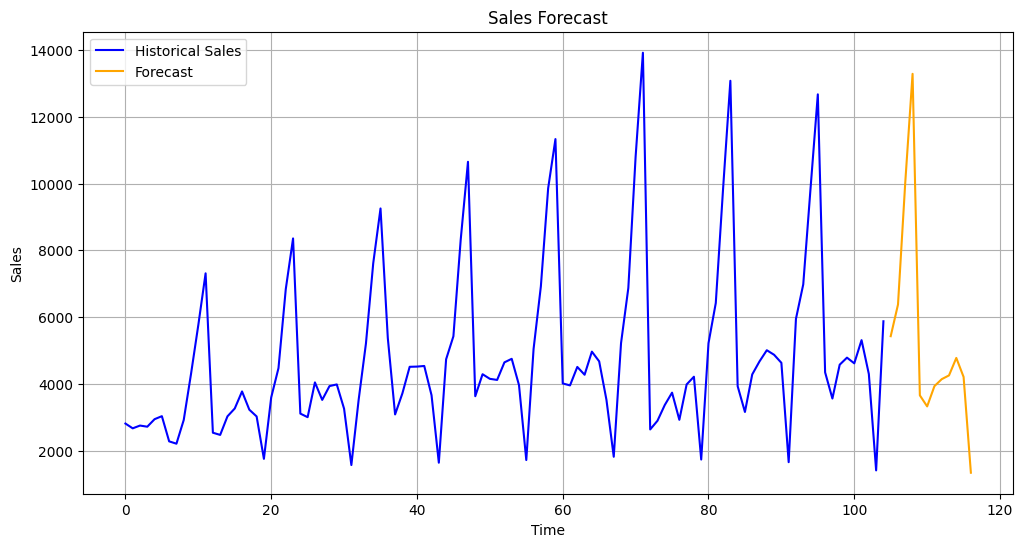

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

# Data preprocessing
def prepare_data(data, sequence_length=12):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[['Sales']]).flatten()

    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i + sequence_length])
        y.append(scaled_data[i + sequence_length])

    return np.array(X), np.array(y), scaler

# Model architecture
def create_model(sequence_length):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=2, activation='relu'),
        Dropout(0.2),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    return model

# Prediction and plotting
def plot_predictions(train_data, predictions, scaler):
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['Sales'].values, label='Historical Sales', color='blue')

    # Plot predictions
    forecast_index = np.arange(len(train_data), len(train_data) + len(predictions))
    predictions_unscaled = scaler.inverse_transform(predictions.reshape(-1, 1))
    plt.plot(forecast_index, predictions_unscaled, label='Forecast', color='orange')

    plt.title('Sales Forecast')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
sequence_length = 12
train_data = pd.read_csv('monthly-sales-data.csv')
test_data = pd.read_csv('test-sales-data.csv')

# Prepare data
X, y, scaler = prepare_data(train_data, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Create and train model
model = create_model(sequence_length)
model.fit(X, y, epochs=500, batch_size=64, verbose=1)

# Generate predictions for next 12 months
last_sequence = X[-1:]
predictions = []

for _ in range(12):
    next_pred = model.predict(last_sequence)
    predictions.append(next_pred[0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = next_pred

predictions = np.array(predictions)

# Plot results with scaler
plot_predictions(train_data, predictions, scaler)


In [ ]:
# Evaluate model accuracy on the training data using Mean Absolute Percentage Error (MAPE)
# Note: In regression tasks, “accuracy” isn’t defined in the same way as in classification.
# Here we compute MAPE and then define accuracy as (100 - MAPE),
# which gives a heuristic “accuracy percentage.”

# Predict on the training sequences
train_predictions = model.predict(X)
# Inverse-transform predictions and true values to the original scale
train_predictions_unscaled = scaler.inverse_transform(train_predictions)
y_unscaled = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate MAPE
mape = np.mean(np.abs((y_unscaled - train_predictions_unscaled) / y_unscaled)) * 100
accuracy = 100 - mape

print("Model Accuracy on Training Data: {:.2f}%".format(accuracy))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Model Accuracy on Training Data: 93.25%


In [ ]:
from sklearn.metrics import accuracy_score

# Ensure the length of actual sales data matches the number of predictions
actual_sales = test_data['Sales'].values[:len(predictions)]

# Choose a threshold to convert continuous values into binary classes
# Here we use the median of the actual sales to classify as high (> median) or low (<= median)
threshold = np.median(actual_sales)

# Convert predictions and actual sales into binary classes based on the threshold
binary_predictions = (predictions.flatten() > threshold).astype(int)
binary_actuals = (actual_sales > threshold).astype(int)

# Calculate classification accuracy
classification_accuracy = accuracy_score(binary_actuals, binary_predictions)
print("Classification Accuracy:", classification_accuracy)

# Define a function to calculate MAPE (Mean Absolute Percentage Error)
def calculate_mape(true_values, pred_values):
    true_values, pred_values = np.array(true_values), np.array(pred_values)
    return np.mean(np.abs((true_values - pred_values) / true_values)) * 100

# Calculate MAPE
mape_accuracy = calculate_mape(actual_sales, predictions)
print("MAPE Accuracy Percentage:", mape_accuracy)


Classification Accuracy: 0.5
MAPE Accuracy Percentage: 99.7777386918348
